# 정규화(원핫 인코딩 + 표준화)

In [44]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 999

In [50]:
plant = pd.read_csv("data/31.finaldata_plant/plant.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,HOUR
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-4.561169,4,13,0
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.222123,4,13,3
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-2.896847,4,13,6
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-2.896847,4,13,9
4,2016-04-01 12:00:00,1,1,16.00,28.00,10.00,18.00,20.00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-2.502215,4,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-5.252838,3,13,23
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-5.099800,3,13,23
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-4.874884,3,13,23
349315,2019-03-31 23:30:00,2,3,8.32,39.13,9.49,4.57,51.47,0.0,2019-04-01 23:30:00,0.0,2019-04-02 23:30:00,0.0,-4.776917,3,13,23


In [52]:
test_data = pd.read_csv("data/31.finaldata_plant/test_data.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,HOUR
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-4.482439,4,14,0
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.247107,4,14,4
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.163210,4,14,10
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-3.042714,4,14,11
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-9.291221,4,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-4.745901,3,13,3
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-4.125121,3,13,5
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-4.064845,3,13,7
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-2.224313,3,13,11


In [47]:
from sklearn.preprocessing import StandardScaler
def preprosess(data):
    # 파생변수를 스케줄링 해줌(표준화)
    scaling_features = data[['TEM_IN', 'HUM_IN', "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "DEW_POINT_IN"]]
    scaler = StandardScaler()
    scaled_nd = scaler.fit_transform(scaling_features)
    scaled_df = pd.DataFrame(scaled_nd, columns=scaling_features.columns)
    data.drop(['TEM_IN', 'HUM_IN', "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "DEW_POINT_IN"], axis=1, inplace=True)
    data = pd.concat([data,scaled_df ], axis=1)
    # 원-핫 인코딩
    category = ["PLANT", "LOC", "MONTH", "WEEK","HOUR"]
    data = pd.get_dummies(data , columns=category)

    return data

In [51]:
plant = preprosess(plant)
plant

,MEA_DDHR,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.948895,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.919136,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-04-01 06:00:00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.802814,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-04-01 09:00:00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.802814,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-04-01 12:00:00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-0.036700,-1.768877,-0.585582,0.395291,-2.232452,-0.768177,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-0.809775,-1.060492,-0.632083,-0.803207,-0.582818,-1.009604,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
349313,2019-03-31 23:10:00,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-0.812784,-1.022981,-0.628125,-0.803207,-0.522647,-0.996172,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
349314,2019-03-31 23:20:00,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-0.809775,-0.981142,-0.625157,-0.808622,-0.581220,-0.976431,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
349315,2019-03-31 23:30:00,0.0,2019-04-01 23:30:00,0.0,2019-04-02 23:30:00,0.0,-0.806767,-0.965993,-0.636040,-0.816744,-0.556726,-0.967832,0,1,0,0,1,0,0,1

In [55]:
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,HOUR
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-4.482439,4,14,0
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.247107,4,14,4
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.163210,4,14,10
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-3.042714,4,14,11
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-9.291221,4,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-4.745901,3,13,3
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-4.125121,3,13,5
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-4.064845,3,13,7
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-2.224313,3,13,11


# 모델링
## train, test 데이터 분리

In [19]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)


In [22]:
plant.head()

,COND_LOC,X24H_COND_LOC,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52
0,0.0,0.0,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.948895,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.919136,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.802814,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.802814,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,-0.036700,-1.768877,-0.585582,0.395291,-2.232452,-0.768177,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train24_y = plant[['X24H_COND_LOC']]
train48_y = plant[['X48H_COND_LOC']]

## 24시간 후 결로 예상 분류

In [25]:
from sklearn.model_selection import train_test_split
X_train24, X_val24, y_train24, y_val24 = train_test_split(train_X, train24_y, test_size=0.3, shuffle=True, random_state=42)

## 48시간 후 결로 예상 분류

In [27]:
from sklearn.model_selection import train_test_split
X_train48, X_val48, y_train48, y_val48 = train_test_split(train_X, train48_y, test_size=0.3, shuffle=True, random_state=42)

# Random Forest
## 24 시간 결로 예측

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
y_pred24 = rf_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104207
         1.0       0.95      0.64      0.77       589

    accuracy                           1.00    104796
   macro avg       0.98      0.82      0.88    104796
weighted avg       1.00      1.00      1.00    104796



In [31]:
imp_rf24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model24.feature_importances_], columns=['variable', 'importance'])
imp_rf24_df.sort_values(by='importance', ascending=False, inplace=True)

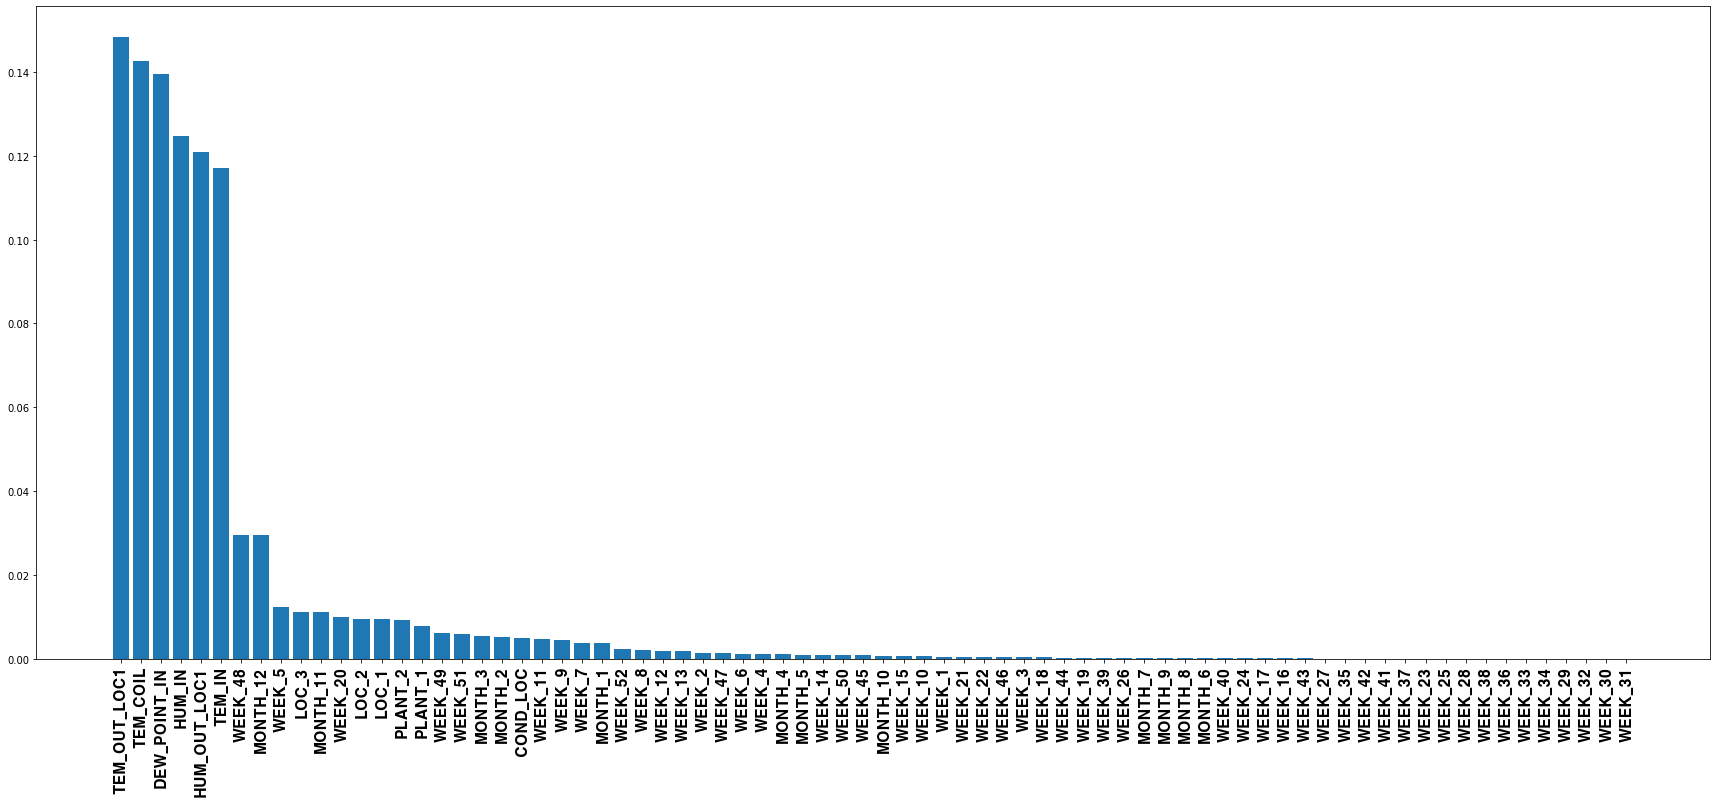

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf24_df.variable, imp_rf24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48시간 결로 예측

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model48.fit(X_train48, y_train48)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
y_pred48 = rf_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104192
         1.0       0.95      0.60      0.73       604

    accuracy                           1.00    104796
   macro avg       0.97      0.80      0.87    104796
weighted avg       1.00      1.00      1.00    104796



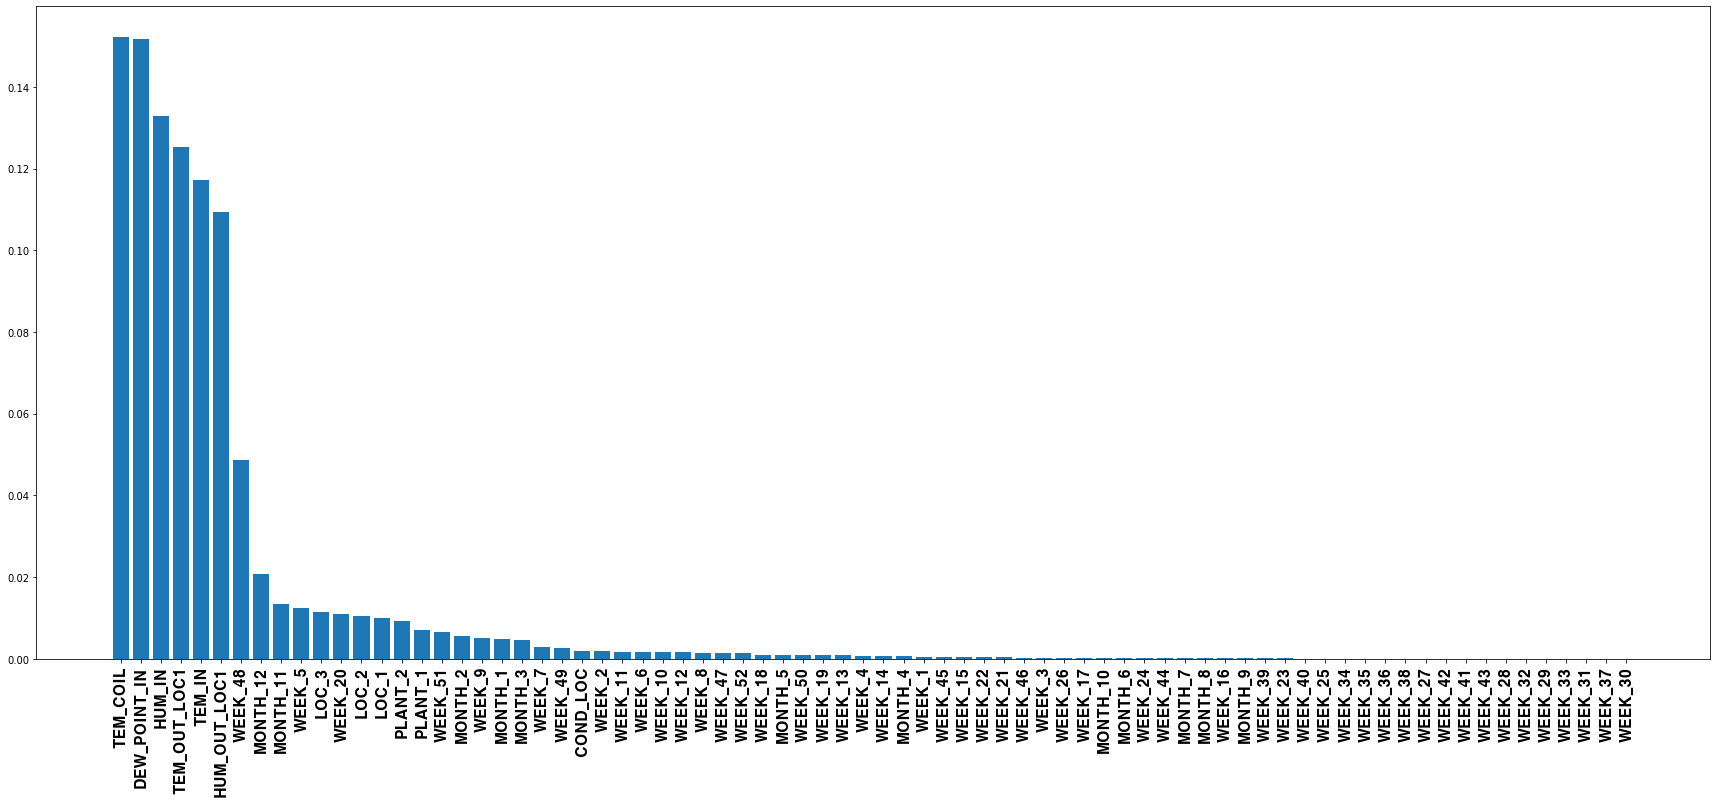

In [36]:
imp_rf48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model48.feature_importances_], columns=['variable', 'importance'])
imp_rf48_df.sort_values(by='importance', ascending=False, inplace=True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf48_df.variable, imp_rf48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## test_data 값 가져와서 예측 해보기